<a href="https://colab.research.google.com/github/MrAgabaidu/Data-Sciences/blob/main/Decision_Tree_and_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
import seaborn as sns

In [15]:
df=pd.read_csv('kyphosis.csv')

In [16]:
df.head(5)

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [18]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [19]:
type(df)

pandas.core.frame.DataFrame

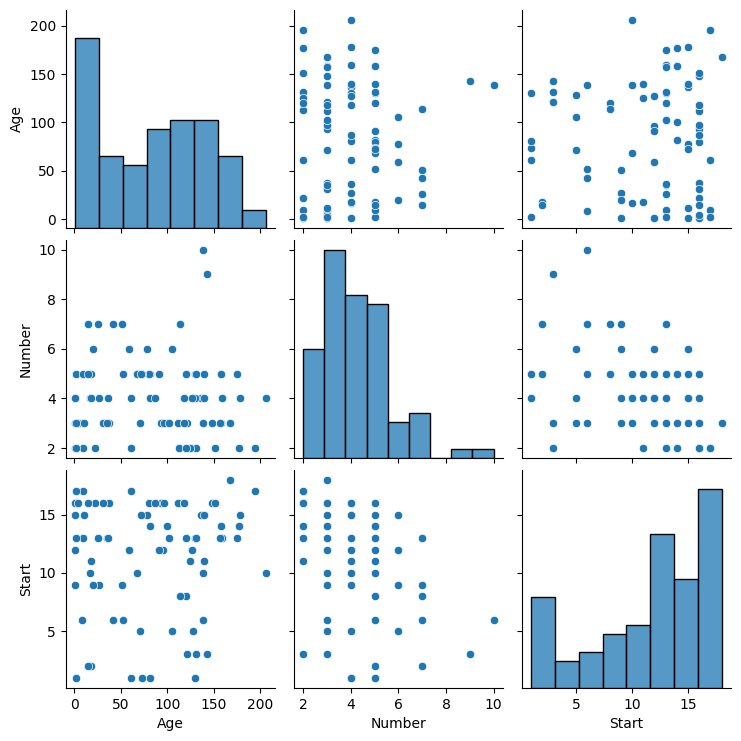

In [21]:
sns.pairplot(data=df)

In [23]:
df2=pd.read_csv('/content/drive/MyDrive/colab upload/kyphosis.csv')

In [24]:
df2.head(5)

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [26]:
from sklearn.model_selection import train_test_split

In [39]:
x=df.drop('Kyphosis', axis=1)
y=df['Kyphosis']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
dtree = DecisionTreeClassifier()

In [51]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [53]:
prediction = dtree.predict(X_test)

In [54]:
prediction

array(['absent', 'absent', 'present', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'present', 'absent', 'absent',
       'present', 'absent', 'absent', 'absent', 'absent', 'present',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent'], dtype=object)

In [57]:
from sklearn.metrics import classification_report, confusion_matrix

In [59]:
print(confusion_matrix(y_test, prediction))

[[17  2]
 [ 4  2]]


In [61]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

      absent       0.81      0.89      0.85        19
     present       0.50      0.33      0.40         6

    accuracy                           0.76        25
   macro avg       0.65      0.61      0.62        25
weighted avg       0.74      0.76      0.74        25



## **RANDOM FOREST**

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
rfc = RandomForestClassifier(n_estimators=200)

In [70]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [72]:
prediction2=rfc.predict(X_test)

In [73]:
print(confusion_matrix(y_test, prediction2))

[[19  0]
 [ 5  1]]


In [75]:
print(classification_report(y_test, prediction2))

              precision    recall  f1-score   support

      absent       0.79      1.00      0.88        19
     present       1.00      0.17      0.29         6

    accuracy                           0.80        25
   macro avg       0.90      0.58      0.58        25
weighted avg       0.84      0.80      0.74        25



In [93]:
df['Kyphosis'].value_count()

absent     64
present    17
Name: Kyphosis, dtype: int64

## **DECISION TREE VISUALIZATION**